# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

# 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn을 불러 옵니다
# 구 버전의 주피터 노트북에서는 %matplotlib inline 설정이 되어야 노트북 안에서 그래프를 시각화 합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정

In [3]:
# Google Colab  사용시 아래 주석을 풀고 폰트 설정을 합니다.
# 로컬 아나콘다 사용시에는 그대로 주석처리 해놓으시면 됩니다. 
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 Colab에서는 오류가 발생하니 아래에 있는 폰트 설정을 꼭 주석처리 할것
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font.manager as fm

# fontpath = '/user/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# colab의 한글 폰트 설정
# plt.rc('font', family='NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc("axes", unicode_minus=False)

In [2]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져 보입니다
# 한글이 출력될수 있도록 폰트 설정을 해줍니다
# 운영체제별 설명을 위해 로드 합니다

import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다

%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [4]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어 옵니다
# 파일을 읽어 온 후 shape로 행과 열의 수를 출력합니다.

df = pd.read_csv("건강검진정보.csv", encoding="cp949")
df.shape

(389412, 34)

In [9]:
# sample, head, tail로 데이터 미리 보기를 합니다
# smaple 은 랜덤하게 하나의 샘플만 가져 온다 

df.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
51413,2019,662002,48,1,8,170,75,83.5,1.2,1.5,...,26.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231


In [7]:
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,610589,11,2,11,150,50,68.0,1.0,1.0,...,29.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
1,2019,610590,42,1,9,175,85,90.0,1.0,1.2,...,35.0,2.0,1.0,1,0.0,미시행,미시행,미시행,1.0,20191231
2,2019,610591,31,1,12,155,60,82.5,0.5,0.5,...,43.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
3,2019,610592,26,2,14,155,50,71.0,0.7,0.7,...,11.0,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,610593,26,2,14,155,50,76.0,0.9,0.8,...,9.0,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


# 기본정보 보기

In [10]:
# infor를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389412 entries, 0 to 389411
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   기준년도           389412 non-null  int64  
 1   가입자 일련번호       389412 non-null  int64  
 2   시도코드           389412 non-null  int64  
 3   성별코드           389412 non-null  int64  
 4   연령대 코드(5세단위)   389412 non-null  int64  
 5   신장(5Cm단위)      389412 non-null  int64  
 6   체중(5Kg 단위)     389412 non-null  int64  
 7   허리둘레           389245 non-null  float64
 8   시력(좌)          389330 non-null  float64
 9   시력(우)          389332 non-null  float64
 10  청력(좌)          389342 non-null  float64
 11  청력(우)          389343 non-null  float64
 12  수축기 혈압         387363 non-null  float64
 13  이완기 혈압         387362 non-null  float64
 14  식전혈당(공복혈당)     387334 non-null  float64
 15  총 콜레스테롤        129983 non-null  float64
 16  트리글리세라이드       129982 non-null  float64
 17  HDL 콜레스테롤      129981 non-nul

In [14]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력합니다

df.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [16]:
# dtypes 를 통해 데이터 형식만 출력합니다. 

df.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

# 결측치 보기

In [24]:
# True == 1

In [22]:
# isnull 을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다 결측치 수를 세어줍니다

df.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                167
시력(좌)                82
시력(우)                80
청력(좌)                70
청력(우)                69
수축기 혈압             2049
이완기 혈압             2050
식전혈당(공복혈당)         2078
총 콜레스테롤          259429
트리글리세라이드         259430
HDL 콜레스테롤        259431
LDL 콜레스테롤        261940
혈색소                2080
요단백                3923
혈청크레아티닌            2078
(혈청지오티)AST         2077
(혈청지오티)ALT         2078
감마 지티피             2078
흡연상태                 72
음주여부             138235
구강검진 수검여부             0
치아우식증유무          234286
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               234286
데이터 공개일자              0
dtype: int64

In [26]:
# isna 로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있습니다

df.isna().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                167
시력(좌)                82
시력(우)                80
청력(좌)                70
청력(우)                69
수축기 혈압             2049
이완기 혈압             2050
식전혈당(공복혈당)         2078
총 콜레스테롤          259429
트리글리세라이드         259430
HDL 콜레스테롤        259431
LDL 콜레스테롤        261940
혈색소                2080
요단백                3923
혈청크레아티닌            2078
(혈청지오티)AST         2077
(혈청지오티)ALT         2078
감마 지티피             2078
흡연상태                 72
음주여부             138235
구강검진 수검여부             0
치아우식증유무          234286
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               234286
데이터 공개일자              0
dtype: int64

<AxesSubplot:>

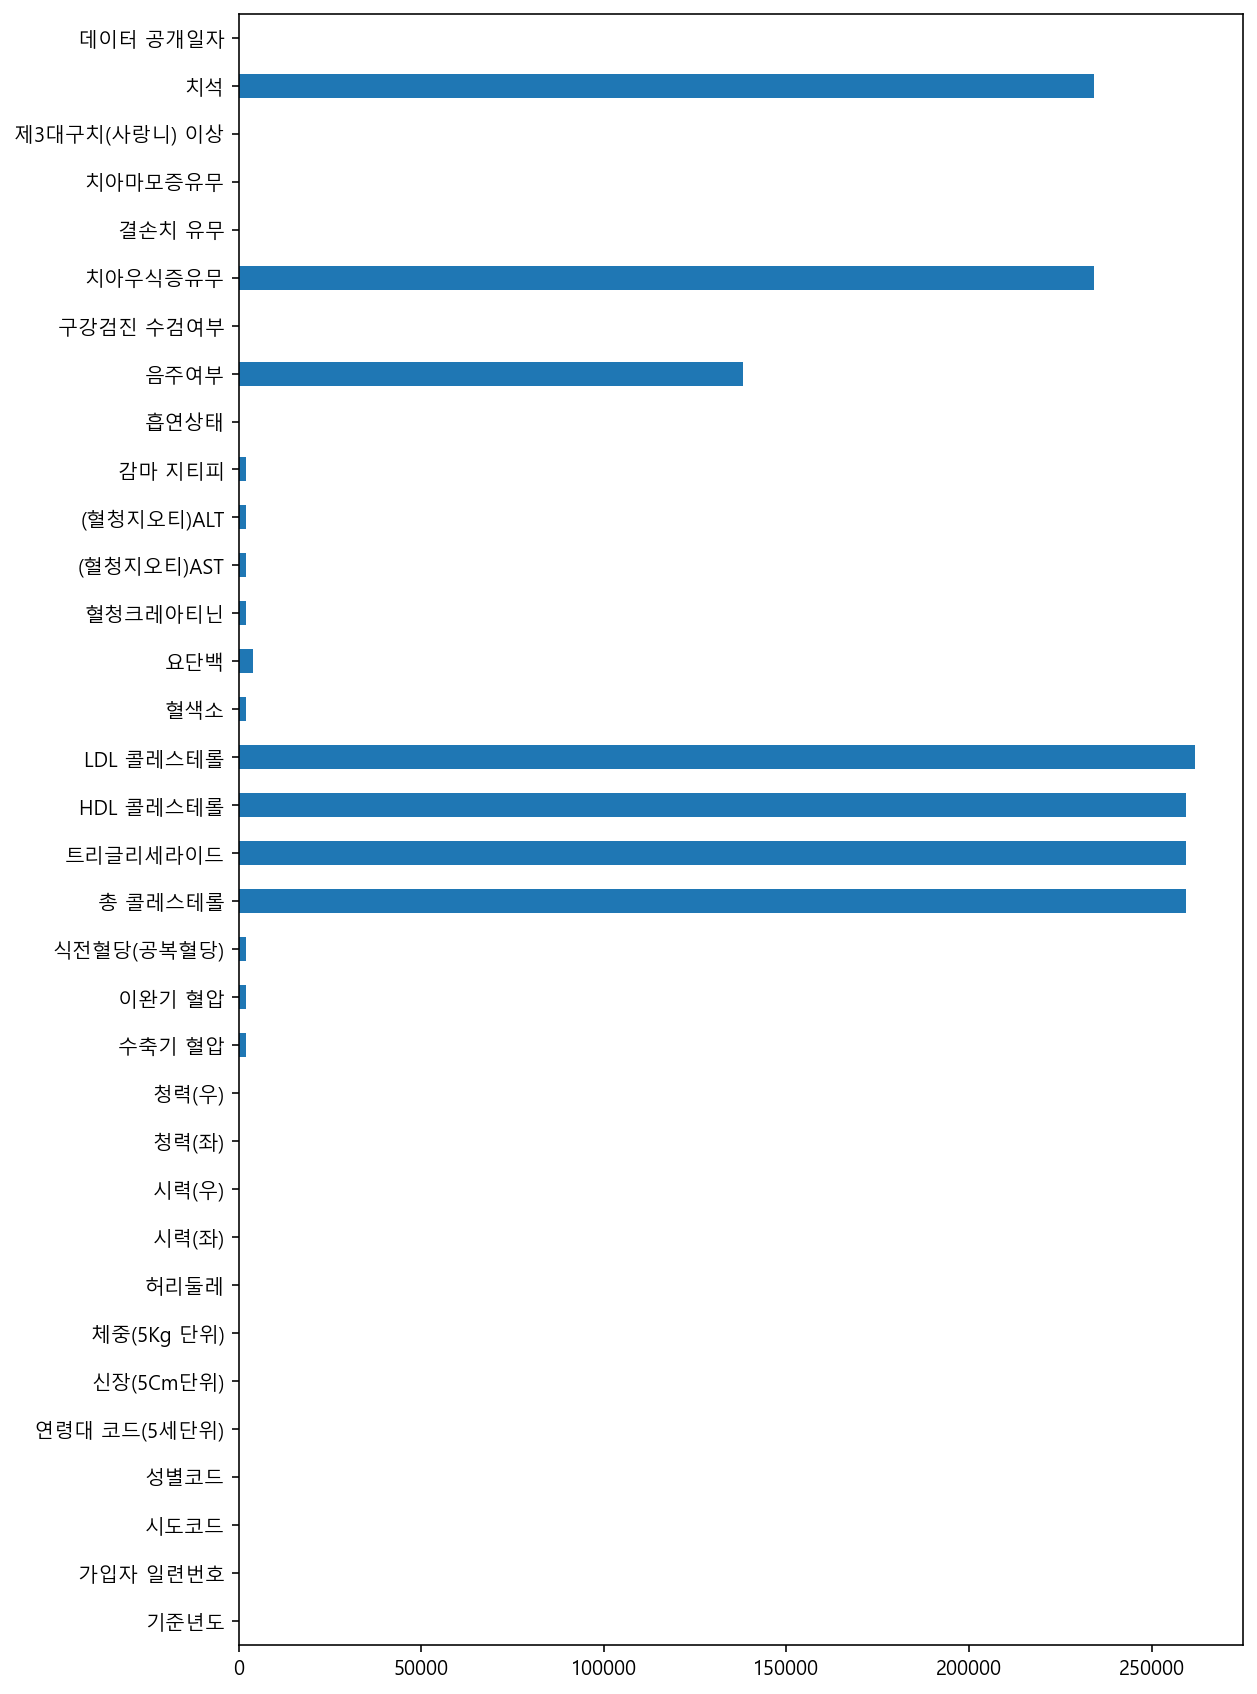

In [35]:
# 판다스에 내장된 plot을 통해 시각화를 합니다. 

df.isnull().sum().plot.barh(figsize=(9,15))

# 일부 데이터 요약하기

In [49]:
# 여러 컬럼을 가져옵니다
# "(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와 미리보기 합니다
# 리스트는 데이터프레임 형태로 가져온다
# 한 개 컬럼은 시리즈로 불러 온다 but 리스트를 취하면 데이터프레임으로 가져온다 
# 두 개 이상의 컬럼은 리스트로 불러와야 한다 

df[["(혈청지오티)ALT"]]

,(혈청지오티)ALT
0,24.0
1,32.0
2,28.0
3,12.0
4,14.0
...,...
389407,23.0
389408,15.0
389409,28.0
389410,65.0


In [51]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]]

,(혈청지오티)ALT,(혈청지오티)AST
0,24.0,30.0
1,32.0,27.0
2,28.0,31.0
3,12.0,22.0
4,14.0,18.0
...,...,...
389407,23.0,24.0
389408,15.0,16.0
389409,28.0,23.0
389410,65.0,25.0


In [59]:
# "(혈정지오티)ALT", "(혈정지오티)AST"를 요약합니다.  info  /  describe

df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389412 entries, 0 to 389411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  387334 non-null  float64
 1   (혈청지오티)AST  387335 non-null  float64
dtypes: float64(2)
memory usage: 5.9 MB


,(혈청지오티)ALT,(혈청지오티)AST
count,387334.000000,387335.000000
mean,25.996750,26.217318
std,28.045243,23.142104
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,6435.000000,6948.000000


# value_counts로 값 집계하기

<AxesSubplot:>

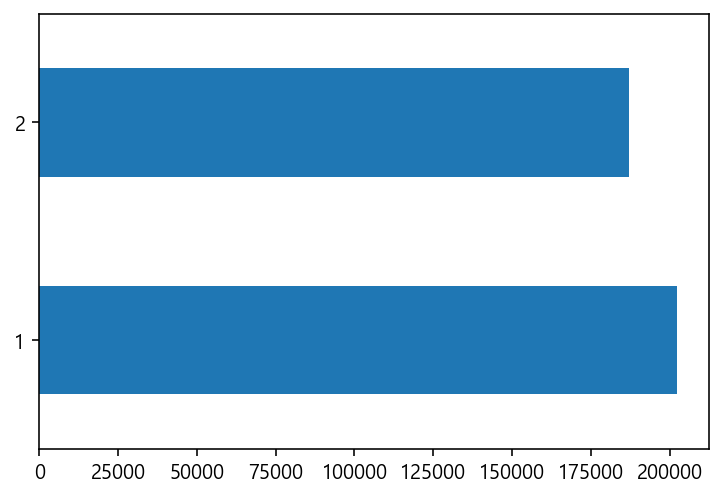

In [63]:
# value_counts를 통해 성별코드로 그룹화하고 개수를 집계합니다

df["성별코드"].value_counts().plot.barh()

In [65]:
# value_counts를 통해 흡연상태로 그룹화 하고 개수를 집계합니다. 

df["흡연상태"].value_counts()

1.0    245074
2.0    144266
Name: 흡연상태, dtype: int64